<a href="https://colab.research.google.com/github/AfzalNMSU/Graph_Link_Prediction/blob/main/LP_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
#Loading the Karate club graph from Networkx
KG = nx.karate_club_graph()

In [ ]:
print(nx.number_of_nodes(KG))
print(nx.number_of_edges(KG))
print(nx.is_directed(KG))

34
78
False


In [ ]:
KG.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [ ]:
KG.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [ ]:
nodeset = KG.nodes
E = KG.edges

nonEdge_candidates = []
for i in nodeset:
    for j in nodeset:
     if (i,j) and (j,i) not in E:
        nonEdge_candidates.append((i,j))
nonEdges = []
np.random.seed(5)
'''
for i in m: #m is number of observed edges, i.e., |E|
    x = np.random.sample(0, len(nonEdge_candidates)) #make sure the syntax
    nonEdges.append(nonEdges_candidates[x])
'''
print(len(nonEdge_candidates))
#print(nonEdge_candidates)

1000


In [ ]:
# noEdges with the node itself
nonEdges = []
for i in nodeset:
    for j in nodeset:
     if (i,j) in nonEdge_candidates:
        if i<=j:
            nonEdges.append((i,j))

print(len(nonEdges))
#print(nonEdges)

517


In [ ]:
# noEdges without the node itself
nonEdges = []
for i in nodeset:
    for j in nodeset:
     if (i,j) in nonEdge_candidates:
        if i<j:
            nonEdges.append((i,j))

print(len(nonEdges))
#print(nonEdges)

483


In [ ]:
type(KG)

networkx.classes.graph.Graph

In [ ]:
edges=KG.edges
type(edges)

networkx.classes.reportviews.EdgeView

In [ ]:
print(nx.number_of_nodes(KG))
print(nx.number_of_edges(KG))
print(nx.is_directed(KG))

34
78
False


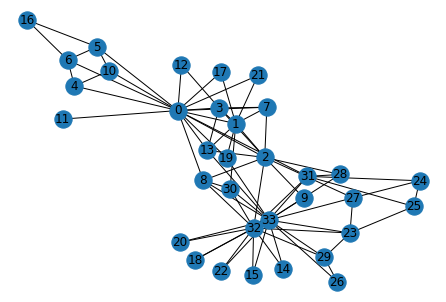

In [ ]:
nx.draw(KG, with_labels=True)
plt.show()

In [ ]:
type(nonEdges)

list

In [ ]:
KGneg = nx.Graph(nonEdges)
type(KGneg)

networkx.classes.graph.Graph

In [ ]:
type(KGneg.edges)

networkx.classes.reportviews.EdgeView

In [ ]:
print("Number of nodes in KG: 34")
print("Number of possible edges", 34*33/2)
print("Number of edges in KG: 78")
print("Number of nonedges in KG: (561-78) =",561-78)

Number of nodes in KG: 34
Number of possible edges 561.0
Number of edges in KG: 78
Number of nonedges in KG: (561-78) = 483


In [ ]:
print(nx.number_of_nodes(KGneg))
print(nx.number_of_edges(KGneg))
print(nx.is_directed(KGneg))

34
483
False


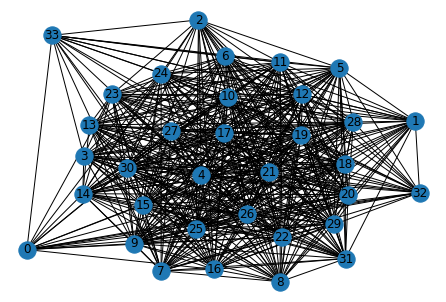

In [ ]:
nx.draw(KGneg, with_labels=True)
plt.show()

In [ ]:
#Line graph of Karate club
LG_KG = nx.line_graph(KG, create_using=None)
#print(sorted(map(sorted, LG_KG.edges())))

In [ ]:
len(LG_KG)

78

In [ ]:
type(LG_KG)

networkx.classes.graph.Graph

In [ ]:
print(nx.number_of_nodes(LG_KG))
print(nx.number_of_edges(LG_KG))
print(nx.is_directed(LG_KG))

78
528
False


In [ ]:
LG_KG.nodes

NodeView(((0, 11), (0, 4), (0, 19), (0, 2), (1, 2), (2, 27), (27, 33), (0, 7), (0, 12), (0, 21), (0, 31), (5, 6), (6, 16), (2, 8), (0, 5), (0, 3), (0, 6), (0, 17), (0, 8), (9, 33), (23, 33), (1, 19), (19, 33), (4, 10), (5, 10), (26, 33), (30, 33), (8, 32), (15, 32), (22, 32), (0, 1), (24, 27), (24, 31), (14, 33), (28, 33), (0, 10), (8, 33), (32, 33), (31, 33), (20, 32), (18, 32), (23, 27), (31, 32), (0, 13), (3, 13), (14, 32), (13, 33), (1, 13), (2, 28), (28, 31), (20, 33), (23, 25), (29, 33), (2, 13), (1, 3), (1, 17), (15, 33), (2, 32), (23, 32), (30, 32), (26, 29), (22, 33), (1, 7), (2, 3), (3, 12), (24, 25), (23, 29), (29, 32), (1, 21), (2, 9), (2, 7), (25, 31), (8, 30), (4, 6), (1, 30), (18, 33), (3, 7), (5, 16)))

In [ ]:
#LG_KG.edges

In [ ]:
#Adjacency list
print("Adjacency List of 𝐺(𝐸,𝑉):\n")
[(n, nbrdict) for n, nbrdict in LG_KG.adjacency()]

Adjacency List of 𝐺(𝐸,𝑉):



[((0, 11),
  {(0, 1): {},
   (0, 2): {},
   (0, 3): {},
   (0, 4): {},
   (0, 5): {},
   (0, 6): {},
   (0, 7): {},
   (0, 8): {},
   (0, 10): {},
   (0, 12): {},
   (0, 13): {},
   (0, 17): {},
   (0, 19): {},
   (0, 21): {},
   (0, 31): {}}),
 ((0, 4),
  {(0, 1): {},
   (0, 2): {},
   (0, 3): {},
   (0, 5): {},
   (0, 6): {},
   (0, 7): {},
   (0, 8): {},
   (0, 10): {},
   (0, 11): {},
   (0, 12): {},
   (0, 13): {},
   (0, 17): {},
   (0, 19): {},
   (0, 21): {},
   (0, 31): {},
   (4, 6): {},
   (4, 10): {}}),
 ((0, 19),
  {(0, 1): {},
   (0, 2): {},
   (0, 3): {},
   (0, 4): {},
   (0, 5): {},
   (0, 6): {},
   (0, 7): {},
   (0, 8): {},
   (0, 10): {},
   (0, 11): {},
   (0, 12): {},
   (0, 13): {},
   (0, 17): {},
   (0, 21): {},
   (0, 31): {},
   (1, 19): {},
   (19, 33): {}}),
 ((0, 2),
  {(0, 1): {},
   (0, 3): {},
   (0, 4): {},
   (0, 5): {},
   (0, 6): {},
   (0, 7): {},
   (0, 8): {},
   (0, 10): {},
   (0, 11): {},
   (0, 12): {},
   (0, 13): {},
   (0, 17): {},
   (0,

In [ ]:
#Adjacency matrix
def adjacency_matrix(g, nodelist=None, weight="weight"):
    return nx.to_scipy_sparse_matrix(g, nodelist=nodelist, weight=weight)

a = adjacency_matrix(LG_KG, nodelist=None, weight="weight")
print(a)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 30)	1
  (0, 35)	1
  (0, 43)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 10)	1
  (1, 14)	1
  (1, 15)	1
  (1, 16)	1
  :	:
  (75, 25)	1
  (75, 26)	1
  (75, 33)	1
  (75, 34)	1
  (75, 36)	1
  (75, 37)	1
  (75, 38)	1
  (75, 40)	1
  (75, 46)	1
  (75, 50)	1
  (75, 52)	1
  (75, 56)	1
  (75, 61)	1
  (76, 7)	1
  (76, 15)	1
  (76, 44)	1
  (76, 54)	1
  (76, 62)	1
  (76, 63)	1
  (76, 64)	1
  (76, 70)	1
  (77, 11)	1
  (77, 12)	1
  (77, 14)	1
  (77, 24)	1


In [ ]:
print("Adjacency Matrix of 𝐺(𝐸,𝑉):")
a.todense()

Adjacency Matrix of 𝐺(𝐸,𝑉):


matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import pandas
import networkx as nx

A = nx.to_pandas_adjacency(LG_KG)

print(A)

          (0, 11)  (0, 4)  (0, 19)  (0, 2)  ...  (1, 30)  (18, 33)  (3, 7)  (5, 16)
(0, 11)       0.0     1.0      1.0     1.0  ...      0.0       0.0     0.0      0.0
(0, 4)        1.0     0.0      1.0     1.0  ...      0.0       0.0     0.0      0.0
(0, 19)       1.0     1.0      0.0     1.0  ...      0.0       0.0     0.0      0.0
(0, 2)        1.0     1.0      1.0     0.0  ...      0.0       0.0     0.0      0.0
(1, 2)        0.0     0.0      0.0     1.0  ...      1.0       0.0     0.0      0.0
...           ...     ...      ...     ...  ...      ...       ...     ...      ...
(4, 6)        0.0     1.0      0.0     0.0  ...      0.0       0.0     0.0      0.0
(1, 30)       0.0     0.0      0.0     0.0  ...      0.0       0.0     0.0      0.0
(18, 33)      0.0     0.0      0.0     0.0  ...      0.0       0.0     0.0      0.0
(3, 7)        0.0     0.0      0.0     0.0  ...      0.0       0.0     0.0      0.0
(5, 16)       0.0     0.0      0.0     0.0  ...      0.0       0.0     0.0  

In [ ]:
#Degree Matrix
import numpy as np

degree = np.zeros(len(A)) # initialize list to hold values of degree
print(degree)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
# calculate the sums along rows and sum along columns
colsum = a.sum(axis=0)
rowsum = a.sum(axis=1)

#"a" & "A" duitai adjacency matrix indicate kortese. kintu duitar format duirokom. Tai duitai vinno vinno jaygay use kora hoise.

In [ ]:
# loop through matrix and add up all degree connections
for j in range(0, len(A)):
    degree[j] = colsum[0,j] + rowsum[j,0]
    
# get the diagonal entries to correct the for loop oversumming
Dia = a.diagonal()
d = Dia.flat
diagMat = list(d)

# print the degree of connectivity matrix
D = np.diag(degree - diagMat)
print("Degree Matrix of 𝐺(𝐸,𝑉):\n")
print(D)

Degree Matrix of 𝐺(𝐸,𝑉):

[[30.  0.  0. ...  0.  0.  0.]
 [ 0. 34.  0. ...  0.  0.  0.]
 [ 0.  0. 34. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 34.  0.  0.]
 [ 0.  0.  0. ...  0. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  8.]]


In [ ]:
D.shape

(78, 78)

In [ ]:
print("Laplacian Matrix of 𝐺(𝐸,𝑉):\n")
L = D-A
print(L)

Laplacian Matrix of 𝐺(𝐸,𝑉):

          (0, 11)  (0, 4)  (0, 19)  (0, 2)  ...  (1, 30)  (18, 33)  (3, 7)  (5, 16)
(0, 11)      30.0    -1.0     -1.0    -1.0  ...      0.0       0.0     0.0      0.0
(0, 4)       -1.0    34.0     -1.0    -1.0  ...      0.0       0.0     0.0      0.0
(0, 19)      -1.0    -1.0     34.0    -1.0  ...      0.0       0.0     0.0      0.0
(0, 2)       -1.0    -1.0     -1.0    48.0  ...      0.0       0.0     0.0      0.0
(1, 2)        0.0     0.0      0.0    -1.0  ...     -1.0       0.0     0.0      0.0
...           ...     ...      ...     ...  ...      ...       ...     ...      ...
(4, 6)        0.0    -1.0      0.0     0.0  ...      0.0       0.0     0.0      0.0
(1, 30)       0.0     0.0      0.0     0.0  ...     22.0       0.0     0.0      0.0
(18, 33)      0.0     0.0      0.0     0.0  ...      0.0      34.0     0.0      0.0
(3, 7)        0.0     0.0      0.0     0.0  ...      0.0       0.0    16.0      0.0
(5, 16)       0.0     0.0      0.0     0.0  ...

In [ ]:
L

,"(0, 11)","(0, 4)","(0, 19)","(0, 2)","(1, 2)","(2, 27)","(27, 33)","(0, 7)","(0, 12)","(0, 21)","(0, 31)","(5, 6)","(6, 16)","(2, 8)","(0, 5)","(0, 3)","(0, 6)","(0, 17)","(0, 8)","(9, 33)","(23, 33)","(1, 19)","(19, 33)","(4, 10)","(5, 10)","(26, 33)","(30, 33)","(8, 32)","(15, 32)","(22, 32)","(0, 1)","(24, 27)","(24, 31)","(14, 33)","(28, 33)","(0, 10)","(8, 33)","(32, 33)","(31, 33)","(20, 32)","(18, 32)","(23, 27)","(31, 32)","(0, 13)","(3, 13)","(14, 32)","(13, 33)","(1, 13)","(2, 28)","(28, 31)","(20, 33)","(23, 25)","(29, 33)","(2, 13)","(1, 3)","(1, 17)","(15, 33)","(2, 32)","(23, 32)","(30, 32)","(26, 29)","(22, 33)","(1, 7)","(2, 3)","(3, 12)","(24, 25)","(23, 29)","(29, 32)","(1, 21)","(2, 9)","(2, 7)","(25, 31)","(8, 30)","(4, 6)","(1, 30)","(18, 33)","(3, 7)","(5, 16)"
"(0, 11)",30.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 4)",-1.0,34.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
"(0, 19)",-1.0,-1.0,34.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 2)",-1.0,-1.0,-1.0,48.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 2)",0.0,0.0,0.0,-1.0,34.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4, 6)",0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
"(1, 30)",0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,22.0,0.0,0.0,0.0
"(18, 33)",0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0
"(3, 7)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# eigen decomposition using numpy
import numpy as np
eigen_vals, eigen_vecs = np.linalg.eig(L)

In [ ]:
eigen_vals.shape
#print('\nEigenvalues \n%s' % eigen_vals)

(78,)

In [ ]:
eigen_vecs.shape
#print('\nEigenvectors \n%s' % eigen_vecs)

(78, 78)

In [ ]:
#checking to get back the L again
dia_eigen_vals = np.diag(eigen_vals)
dia_eigen_vals.shape

(78, 78)

In [ ]:
L_new = eigen_vecs.dot(dia_eigen_vals).dot(eigen_vecs.T)

print(L_new.shape)
print(L_new)

(78, 78)
[[ 3.00000000e+01 -1.00000000e+00 -1.00000000e+00 ... -4.74472305e-14
  -1.31506706e-14  1.14582906e-16]
 [-1.00000000e+00  3.40000000e+01 -1.00000000e+00 ...  1.99922815e-12
  -1.77134153e-15  1.23881647e-14]
 [-1.00000000e+00 -1.00000000e+00  3.40000000e+01 ... -1.30625093e-13
  -2.66621439e-14  5.56964718e-15]
 ...
 [-4.74777540e-14  1.99928576e-12 -1.30650026e-13 ...  2.28262681e+01
  -1.27058310e-14  2.14999819e-16]
 [-1.30973355e-14 -1.78121014e-15 -2.66328407e-14 ... -1.26518629e-14
   1.60000000e+01  3.82386093e-14]
 [ 6.93889390e-17  1.23789867e-14  5.52335955e-15 ...  2.14831150e-16
   3.82373835e-14  8.00000000e+00]]


In [ ]:
# we can also compute in this way. both are similar
from numpy import linalg as LA
eigen_vals, eigen_vecs = LA.eig(L)

print(eigen_vals.shape)
print(eigen_vecs.shape)

(78,)
(78, 78)


In [ ]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = L.to_numpy()
eigenvalues, eigenvectors = eigsh(L_array, k=4)


#print(eigenvalues)
#print(eigenvectors)
print(eigenvalues.shape)
print(eigenvectors.shape)

(4,)
(78, 4)


In [ ]:
#print(eigenvalues)
#print(eigenvectors)

In [ ]:
z = eigenvectors

In [ ]:
# Printing cosine similarities for eigenvectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
A_prime = pd.DataFrame(cosine_similarity(z))
print(A_prime)

          0         1         2   ...        75        76        77
0   1.000000  0.999463  0.992986  ... -0.096837 -0.992987 -0.995524
1   0.999463  1.000000  0.995289  ... -0.116186 -0.996297 -0.998085
2   0.992986  0.995289  1.000000  ... -0.197474 -0.995958 -0.996840
3  -0.681749 -0.664306 -0.671124  ... -0.020111  0.612188  0.630237
4   0.974252  0.970886  0.945201  ...  0.020266 -0.959157 -0.961363
..       ...       ...       ...  ...       ...       ...       ...
73 -0.996410 -0.998648 -0.996688  ...  0.146381  0.999362  0.999948
74  0.683642  0.695475  0.665081  ... -0.062832 -0.727818 -0.714792
75 -0.096837 -0.116186 -0.197474  ...  1.000000  0.171154  0.153016
76 -0.992987 -0.996297 -0.995958  ...  0.171154  1.000000  0.999617
77 -0.995524 -0.998085 -0.996840  ...  0.153016  0.999617  1.000000

[78 rows x 78 columns]


In [ ]:
# Printing cosine similarities for eigenvectors
from sklearn.metrics.pairwise import cosine_similarity
A_prime = cosine_similarity(z)
print(A_prime)

[[ 1.          0.99946346  0.99298647 ... -0.09683735 -0.99298676
  -0.99552369]
 [ 0.99946346  1.          0.99528863 ... -0.11618612 -0.99629689
  -0.99808473]
 [ 0.99298647  0.99528863  1.         ... -0.19747358 -0.99595815
  -0.99683958]
 ...
 [-0.09683735 -0.11618612 -0.19747358 ...  1.          0.17115372
   0.15301584]
 [-0.99298676 -0.99629689 -0.99595815 ...  0.17115372  1.
   0.99961734]
 [-0.99552369 -0.99808473 -0.99683958 ...  0.15301584  0.99961734
   1.        ]]


In [ ]:
# Frobenius norm using numpy
# ord=None, norm for matrices='Frobenius norm', norm for vectors='2-norm'

#A_prime_np = A_prime.to_numpy()

In [ ]:
print(np.linalg.norm(A - A_prime, ord='fro'))

46.196290644653715


In [ ]:
# Frobenius norm using scipy
from scipy.linalg import norm

norm(A-A_prime, 'fro')

46.196290644653715

In [ ]:
errors = []

for i in range(1,5):
    eigenvalues, eigenvectors = eigsh(L_array, k=i)
    z = eigenvectors

    A_prime = cosine_similarity(z)

    Frobenius_norm = norm(A-A_prime, 'fro')

    errors.append(Frobenius_norm)

print(errors)

[80.2745289615579, 56.131214230846716, 50.07995672990698, 46.19629064465377]


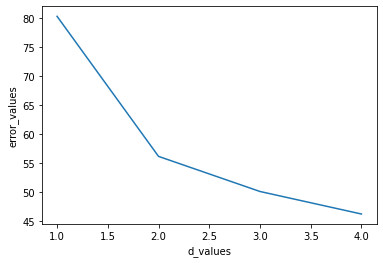

In [ ]:
import matplotlib.pyplot as plt

d= [1,2,3,4]
plt.plot(d,errors)
plt.xlabel('d_values')
plt.ylabel('error_values')
plt.show()

In [ ]:
errors = []

for i in range(1,5):
    eigenvalues, eigenvectors = eigsh(L_array, k=i)
    z = eigenvectors

    A_prime = cosine_similarity(z)

    Frobenius_norm = norm(A-A_prime, 'fro')

    errors.append([i,Frobenius_norm])

print(errors)

[[1, 80.2745289615579], [2, 56.131214230846666], [3, 50.07995672990698], [4, 46.19629064465393]]


In [ ]:
df = pd.DataFrame(errors, columns=['d', 'errors'])
df

,d,errors
0,1,80.274529
1,2,56.131214
2,3,50.079957
3,4,46.196291


In [ ]:
# Specific line graph
import plotly.express as px  
px.line(df, x="d", y="errors")

In [ ]:
#area graph
px.area(df, x="d", y="errors")

In [ ]:
#violin chart
px.violin(df,  y="errors")

In [ ]:
#Line graph of Karate club NEGATIVE
LG_KGneg = nx.line_graph(KGneg, create_using=None)
#print(sorted(map(sorted, LG_KGneg.edges())))

In [ ]:
print(nx.number_of_nodes(LG_KGneg))
print(nx.number_of_edges(LG_KGneg))
print(nx.is_directed(LG_KGneg))

483
13488
False


In [ ]:
#Adjacency list
print("Adjacency List of 𝐺(𝐸,𝑉):\n")
[(n, nbrdict) for n, nbrdict in LG_KGneg.adjacency()]

Adjacency List of 𝐺(𝐸,𝑉):



[((13, 19),
  {(2, 19): {},
   (3, 19): {},
   (4, 13): {},
   (4, 19): {},
   (5, 13): {},
   (5, 19): {},
   (6, 13): {},
   (6, 19): {},
   (7, 13): {},
   (7, 19): {},
   (8, 13): {},
   (8, 19): {},
   (9, 13): {},
   (9, 19): {},
   (10, 13): {},
   (10, 19): {},
   (11, 13): {},
   (11, 19): {},
   (12, 13): {},
   (12, 19): {},
   (13, 14): {},
   (13, 15): {},
   (13, 16): {},
   (13, 17): {},
   (13, 18): {},
   (13, 20): {},
   (13, 21): {},
   (13, 22): {},
   (13, 23): {},
   (13, 24): {},
   (13, 25): {},
   (13, 26): {},
   (13, 27): {},
   (13, 28): {},
   (13, 29): {},
   (13, 30): {},
   (13, 31): {},
   (13, 32): {},
   (14, 19): {},
   (15, 19): {},
   (16, 19): {},
   (17, 19): {},
   (18, 19): {},
   (19, 20): {},
   (19, 21): {},
   (19, 22): {},
   (19, 23): {},
   (19, 24): {},
   (19, 25): {},
   (19, 26): {},
   (19, 27): {},
   (19, 28): {},
   (19, 29): {},
   (19, 30): {},
   (19, 31): {},
   (19, 32): {}}),
 ((13, 21),
  {(2, 21): {},
   (3, 21): {},
   (

In [ ]:
#Adjacency matrix
def adjacency_matrix(g, nodelist=None, weight="weight"):
    return nx.to_scipy_sparse_matrix(g, nodelist=nodelist, weight=weight)

aNeg = adjacency_matrix(LG_KGneg, nodelist=None, weight="weight")
print(aNeg)

  (0, 1)	1
  (0, 8)	1
  (0, 12)	1
  (0, 13)	1
  (0, 27)	1
  (0, 48)	1
  (0, 57)	1
  (0, 59)	1
  (0, 60)	1
  (0, 73)	1
  (0, 74)	1
  (0, 77)	1
  (0, 78)	1
  (0, 86)	1
  (0, 94)	1
  (0, 96)	1
  (0, 97)	1
  (0, 102)	1
  (0, 103)	1
  (0, 109)	1
  (0, 110)	1
  (0, 120)	1
  (0, 121)	1
  (0, 141)	1
  (0, 142)	1
  :	:
  (482, 311)	1
  (482, 315)	1
  (482, 334)	1
  (482, 341)	1
  (482, 342)	1
  (482, 346)	1
  (482, 356)	1
  (482, 363)	1
  (482, 365)	1
  (482, 378)	1
  (482, 384)	1
  (482, 386)	1
  (482, 413)	1
  (482, 414)	1
  (482, 420)	1
  (482, 421)	1
  (482, 426)	1
  (482, 434)	1
  (482, 435)	1
  (482, 442)	1
  (482, 444)	1
  (482, 448)	1
  (482, 454)	1
  (482, 460)	1
  (482, 463)	1


In [ ]:
print("Adjacency Matrix of 𝐺(𝐸,𝑉):")
aNeg.todense()

Adjacency Matrix of 𝐺(𝐸,𝑉):


matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import pandas
import networkx as nx

Aneg = nx.to_pandas_adjacency(LG_KGneg)

print(Aneg)

          (13, 19)  (13, 21)  (2, 26)  ...  (0, 33)  (6, 33)  (23, 24)
(13, 19)       0.0       1.0      0.0  ...      0.0      0.0       0.0
(13, 21)       1.0       0.0      0.0  ...      0.0      0.0       0.0
(2, 26)        0.0       0.0      0.0  ...      0.0      0.0       0.0
(26, 31)       0.0       0.0      1.0  ...      0.0      0.0       0.0
(1, 20)        0.0       0.0      0.0  ...      0.0      0.0       0.0
...            ...       ...      ...  ...      ...      ...       ...
(10, 12)       0.0       0.0      0.0  ...      0.0      0.0       0.0
(14, 19)       1.0       0.0      0.0  ...      0.0      0.0       0.0
(0, 33)        0.0       0.0      0.0  ...      0.0      1.0       0.0
(6, 33)        0.0       0.0      0.0  ...      1.0      0.0       0.0
(23, 24)       0.0       0.0      0.0  ...      0.0      0.0       0.0

[483 rows x 483 columns]


In [ ]:
#Degree Matrix
import numpy as np

degree = np.zeros(len(Aneg)) # initialize list to hold values of degree
print(degree)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# calculate the sums along rows and sum along columns
colsum = aNeg.sum(axis=0)
rowsum = aNeg.sum(axis=1)

#"a" & "A" duitai adjacency matrix indicate kortese. kintu duitar format duirokom. Tai duitai vinno vinno jaygay use kora hoise.

In [ ]:
# loop through matrix and add up all degree connections
for j in range(0, len(Aneg)):
    degree[j] = colsum[0,j] + rowsum[j,0]
    
# get the diagonal entries to correct the for loop oversumming
Dia = aNeg.diagonal()
d = Dia.flat
diagMat = list(d)

# print the degree of connectivity matrix
Dneg = np.diag(degree - diagMat)
print("Degree Matrix of 𝐺(𝐸,𝑉):\n")
print(Dneg)

Degree Matrix of 𝐺(𝐸,𝑉):

[[112.   0.   0. ...   0.   0.   0.]
 [  0. 114.   0. ...   0.   0.   0.]
 [  0.   0. 104. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  62.   0.   0.]
 [  0.   0.   0. ...   0.  86.   0.]
 [  0.   0.   0. ...   0.   0. 112.]]


In [ ]:
print("Laplacian Matrix of 𝐺(𝐸,𝑉):\n")
Lneg = Dneg-Aneg
print(Lneg)

Laplacian Matrix of 𝐺(𝐸,𝑉):

          (13, 19)  (13, 21)  (2, 26)  ...  (0, 33)  (6, 33)  (23, 24)
(13, 19)     112.0      -1.0      0.0  ...      0.0      0.0       0.0
(13, 21)      -1.0     114.0      0.0  ...      0.0      0.0       0.0
(2, 26)        0.0       0.0    104.0  ...      0.0      0.0       0.0
(26, 31)       0.0       0.0     -1.0  ...      0.0      0.0       0.0
(1, 20)        0.0       0.0      0.0  ...      0.0      0.0       0.0
...            ...       ...      ...  ...      ...      ...       ...
(10, 12)       0.0       0.0      0.0  ...      0.0      0.0       0.0
(14, 19)      -1.0       0.0      0.0  ...      0.0      0.0       0.0
(0, 33)        0.0       0.0      0.0  ...     62.0     -1.0       0.0
(6, 33)        0.0       0.0      0.0  ...     -1.0     86.0       0.0
(23, 24)       0.0       0.0      0.0  ...      0.0      0.0     112.0

[483 rows x 483 columns]


In [ ]:
# eigen decomposition using numpy
import numpy as np
eigen_vals_neg, eigen_vecs_neg = np.linalg.eig(Lneg)

In [ ]:
eigen_vals_neg.shape
#print('\nEigenvalues \n%s' % eigen_vals)

(483,)

In [ ]:
eigen_vecs_neg.shape
#print('\nEigenvectors \n%s' % eigen_vecs)

(483, 483)

In [ ]:
#checking to get back the L again
dia_eigen_vals_neg = np.diag(eigen_vals_neg)
dia_eigen_vals_neg.shape

(483, 483)

In [ ]:
Lneg_new = eigen_vecs_neg.dot(dia_eigen_vals_neg).dot(eigen_vecs_neg.T)

print(Lneg_new.shape)
print(Lneg_new)

(483, 483)
[[ 1.12107611e+02 -1.00000000e+00 -2.05700635e-13 ... -1.82225352e-14
   9.35851879e-13 -4.16663173e-01]
 [-1.00000000e+00  1.36545414e+02 -1.49378555e-11 ...  7.58557068e-14
  -6.59407584e-12 -7.25648607e-12]
 [-2.05777494e-13 -1.49376454e-11  1.04000000e+02 ... -1.79383779e-13
   2.12150294e-13 -5.37471493e-14]
 ...
 [-1.84460002e-14  7.58348345e-14 -1.79338236e-13 ...  6.20000000e+01
  -1.00000000e+00  1.21800282e-13]
 [ 9.35757683e-13 -6.59417834e-12  2.11987526e-13 ... -1.00000000e+00
   8.60000000e+01 -1.04197083e-12]
 [-4.16663173e-01 -7.25648314e-12 -5.36462307e-14 ...  1.21916642e-13
  -1.04160938e-12  1.10475649e+02]]


In [ ]:
# we can also compute in this way. both are similar
from numpy import linalg as LA
eigen_vals_neg, eigen_vecs_neg = LA.eig(Lneg)

print(eigen_vals_neg.shape)
print(eigen_vecs_neg.shape)

(483,)
(483, 483)


In [ ]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = Lneg.to_numpy()
eigenvaluesNeg, eigenvectorsNeg = eigsh(L_array, k=4)


#print(eigenvalues)
#print(eigenvectors)
print(eigenvaluesNeg.shape)
print(eigenvectorsNeg.shape)

ArpackNoConvergence: ignored

In [ ]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = Lneg.to_numpy()
eigenvaluesNeg, eigenvectorsNeg = eigsh(L_array, k=4)



#print(eigenvalues)
#print(eigenvectors)
print(eigenvaluesNeg.shape)
print(eigenvectorsNeg.shape)

(4,)
(483, 4)


In [ ]:
eigenvectorsNeg = eigenvectorsNeg[0:78]
eigenvectorsNeg.shape

(78, 4)

In [ ]:
zNeg = eigenvectorsNeg

In [ ]:
# Printing cosine similarities for eigenvectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
A_prime = pd.DataFrame(cosine_similarity(zNeg))
print(A_prime)

          0         1         2   ...        75        76        77
0   1.000000  0.087069  1.000000  ... -1.000000 -1.000000  1.000000
1   0.087069  1.000000  0.087069  ... -0.087069 -0.087069  0.087069
2   1.000000  0.087069  1.000000  ... -1.000000 -1.000000  1.000000
3   1.000000  0.087069  1.000000  ... -1.000000 -1.000000  1.000000
4  -0.463317 -0.040341 -0.463317  ...  0.463317  0.463317 -0.463317
..       ...       ...       ...  ...       ...       ...       ...
73  1.000000  0.087069  1.000000  ... -1.000000 -1.000000  1.000000
74  0.087069 -0.984838  0.087069  ... -0.087069 -0.087069  0.087069
75 -1.000000 -0.087069 -1.000000  ...  1.000000  1.000000 -1.000000
76 -1.000000 -0.087069 -1.000000  ...  1.000000  1.000000 -1.000000
77  1.000000  0.087069  1.000000  ... -1.000000 -1.000000  1.000000

[78 rows x 78 columns]


In [ ]:
# Printing cosine similarities for eigenvectors
from sklearn.metrics.pairwise import cosine_similarity
A_prime = cosine_similarity(zNeg)
print(A_prime)
print(len(A_prime))

[[ 1.          0.08706912  1.         ... -1.         -1.
   1.        ]
 [ 0.08706912  1.          0.08706914 ... -0.08706914 -0.08706911
   0.08706915]
 [ 1.          0.08706914  1.         ... -1.         -1.
   1.        ]
 ...
 [-1.         -0.08706914 -1.         ...  1.          1.
  -1.        ]
 [-1.         -0.08706911 -1.         ...  1.          1.
  -1.        ]
 [ 1.          0.08706915  1.         ... -1.         -1.
   1.        ]]
78


In [ ]:
# Frobenius norm using numpy
# ord=None, norm for matrices='Frobenius norm', norm for vectors='2-norm'

#A_prime_np = A_prime.to_numpy()

In [ ]:
Aneg_new = np.array(Aneg)

Aneg_new = Aneg_new[0:78,0:78]

In [ ]:
Aneg_new.shape

(78, 78)

In [ ]:
print(np.linalg.norm(Aneg_new - A_prime, ord='fro'))

57.308005139040716


In [ ]:
# Frobenius norm using scipy
from scipy.linalg import norm

norm(Aneg_new-A_prime, 'fro')

57.308005139040716

In [ ]:
errors = []

for i in range(1,5):
    eigenvaluesNeg, eigenvectorsNeg = eigsh(Aneg_new, k=i)
    zNeg = eigenvectorsNeg

    A_prime = cosine_similarity(zNeg)

    Frobenius_norm = norm(Aneg_new-A_prime, 'fro')

    errors.append(Frobenius_norm)

print(errors)

[73.00684899377592, 50.25378298330265, 39.490395465286255, 33.52888953661917]


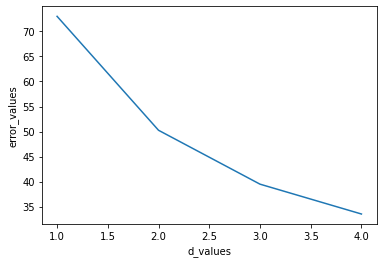

In [ ]:
import matplotlib.pyplot as plt

d= [1,2,3,4]
plt.plot(d,errors)
plt.xlabel('d_values')
plt.ylabel('error_values')
plt.show()

In [ ]:
# Specific line graph
import plotly.express as px  
px.line(df, x="d", y="errors")

In [ ]:
#area graph
px.area(df, x="d", y="errors")

In [ ]:
#violin chart
px.violin(df,  y="errors")

In [ ]:
#print(eigenvalues)
#print(eigenvectors)

In [ ]:
#np.split(eigenvectorsNeg, 3)

In [ ]:
print(eigenvectors.shape)

In [ ]:
#concataning eigenvectors & eigenvectorsNeg
eigenvectorsConcat = np.concatenate((eigenvectors, eigenvectorsNeg), axis=0)
eigenvectorsConcat.shape
#print(eigenvectorsConcat)

In [ ]:
#concataning targets y & yNeg
y = np.repeat(1, 78)
yNeg = np.repeat(0, 78)
yConcat = np.concatenate((y, yNeg), axis=0)
yConcat.shape

In [ ]:
yConcat

In [ ]:
# creating a dataframe using eigenvectorsConcat & yConcat
embeddings = []
for id in range(156):
  embedding = eigenvectorsConcat[id]
  #club = KG.nodes[id]['club']
  embeddings.append([embedding[0], embedding[1], embedding[2], embedding[3], yConcat[id]])
df = pd.DataFrame(embeddings, columns=['x_a', 'x_b', 'x_c', 'x_d', 'y'])
df

## SHUFFLING

In [ ]:
# converting dataframe to numpy for suffling
dfNumpy = df.to_numpy(dtype=None, copy=False)
dfNumpy

In [ ]:
#SHUFFLING
np.random.shuffle(dfNumpy)
dfNumpy_suf = dfNumpy
dfNumpy_suf

## NORMALIZATION

In [ ]:
# normalization example
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer(norm='l2', copy=False).fit(X)  # fit does nothing.
transformer

transformer.transform(X)

In [ ]:
from sklearn.preprocessing import Normalizer
dfNumpy_suf_norm = Normalizer(norm='max', copy=False).fit(dfNumpy_suf)
dfNumpy_suf_norm

# axis=0 refers to normalizing each features. axis=1 refers to normalizing samples
# jodi l1/l2 norm deya hoy sekhetre y er je value pawa jay seta diye train kora jayna. kenona protita individual value hoye jay tokhon

In [ ]:
dfNumpy = dfNumpy_suf_norm.transform(dfNumpy_suf)

In [ ]:
type(dfNumpy)

In [ ]:
dfNumpy

In [ ]:
# converting numpy to DataFrame
dfDataframe = pd.DataFrame(dfNumpy, columns = ['x_a', 'x_b', 'x_c', 'x_d', 'y'])


print(type(dfDataframe))
print(dfDataframe)

In [ ]:
features = ['x_a', 'x_b', 'x_c', 'x_d']
X = dfDataframe[features]
#X

In [ ]:
y = dfDataframe['y']
y

In [ ]:
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#X, y = make_classification(eigenvectors, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

## applying MLPClassifier

In [ ]:

from sklearn.neural_network import MLPClassifier

classifier = 'MLPClassifier'
clf = MLPClassifier(random_state=1, max_iter=390).fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit clf.fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

clf.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % clf.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.



MLPClassifier Run Time:


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

1 loop, best of 5: 351 ms per loop
Train score: 0.9607843137254902
Test score: 0.9444444444444444
Accuracy for MLPClassifier classifier: 0.94


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.



In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.90      1.00      0.95        27

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54




In [ ]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

from sklearn import metrics
predicted = clf.predict(X_test)
print(f"Classification report for classifier MLPClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Train score: 0.963302752293578
Test score: 0.9361702127659575
Classification report for classifier MLPClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.89      1.00      0.94        24

    accuracy                           0.94        47
   macro avg       0.94      0.93      0.94        47
weighted avg       0.94      0.94      0.94        47




In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.89      1.00      0.94        24

    accuracy                           0.94        47
   macro avg       0.94      0.93      0.94        47
weighted avg       0.94      0.94      0.94        47




In [ ]:
# normalize korar age 1336 ta iteration e converge hoy. ar normalize korar pore 432 iteration ei converge hoye jacche

from sklearn.neural_network import MLPClassifier

classifier = 'MLPClassifier'
clf = MLPClassifier(random_state=1, max_iter=432).fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit clf.fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

clf.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % clf.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

MLPClassifier Run Time:
1 loop, best of 5: 390 ms per loop
Train score: 0.963302752293578
Test score: 0.9361702127659575
Accuracy for MLPClassifier classifier: 0.94


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.89      1.00      0.94        24

    accuracy                           0.94        47
   macro avg       0.94      0.93      0.94        47
weighted avg       0.94      0.94      0.94        47




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 0.978494623655914
Test score: 0.8888888888888888


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        31
         1.0       0.91      1.00      0.96        32

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 0.9764705882352941
Test score: 0.9154929577464789


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        35
         1.0       0.92      1.00      0.96        36

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 0.9743589743589743
Test score: 0.9358974358974359


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        39
         1.0       0.93      1.00      0.96        39

    accuracy                           0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78




## applying RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9361702127659575
Accuracy for RandomForestClassifier classifier: 0.94


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.89      1.00      0.94        24

    accuracy                           0.94        47
   macro avg       0.94      0.93      0.94        47
weighted avg       0.94      0.94      0.94        47




In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9615384615384616
Accuracy for RandomForestClassifier classifier: 0.96


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        39
         1.0       0.93      1.00      0.96        39

    accuracy                           0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78




In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9629629629629629
Accuracy for RandomForestClassifier classifier: 0.96


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.93      1.00      0.96        27

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54




In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9523809523809523
Accuracy for RandomForestClassifier classifier: 0.95


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        31
         1.0       0.91      1.00      0.96        32

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63




In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9577464788732394
Accuracy for RandomForestClassifier classifier: 0.96


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        35
         1.0       0.92      1.00      0.96        36

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71




##applyingRandom Forest changing the max_sample

In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=80)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9444444444444444
Accuracy for RandomForestClassifier classifier: 0.94


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.90      1.00      0.95        27

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54




In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=40)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9444444444444444
Accuracy for RandomForestClassifier classifier: 0.94


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.90      1.00      0.95        27

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54




In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=100)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9629629629629629
Accuracy for RandomForestClassifier classifier: 0.96


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.93      1.00      0.96        27

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54




In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=60)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9444444444444444
Accuracy for RandomForestClassifier classifier: 0.94


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        27
         1.0       0.90      1.00      0.95        27

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54




In [ ]:
#test_size=0.34 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=90)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 107 ms per loop
Train score: 1.0
Test score: 0.9629629629629629
Accuracy for RandomForestClassifier classifier: 0.96


In [ ]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.93      1.00      0.96        27

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54


